## Correlation

In this notebook, we're going to see a case study of correlations. We're going to measure the Pearson correlation coefficient for the variability in price of two different stocks at the same day and analyse what can this number show us about their relationships. This coefficient is simply a number that goes from -1 to 1, giving a measurement of how those variables (in this case, daily stock prices for different stocks) vary together. If the prices are positively correlated, this number will be close to positive 1, and if they are negatively correlated, it will be close to negative -1. If the relationship isn't too strong, this number will have a relatively low absolute value.

#### First, we need a program to grab all close prices of both stocks on a large period

In [1]:
# Importing needed libraries

from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt

# running program that contains a function to obtain daily close prices:

%run closePrices.py

## Strong correlation

### 1. Positive "strong" correlations

For this, let's first look at the chart behavior of two stocks that have a strong correlation. For that, we'll first analyze a kind of intuitive assumption: two differents stocks of the same company will certainly have a strong correlation even though their prices are different.

In [2]:
# analyzing prices for two different companies: Banco Inter and Itaú Unibanco:

df_list = [bidi_df, itub_df] = closePrices(['BIDI4.SA','BIDI11.SA']), closePrices(['ITUB3.SA','ITUB4.SA'])

# Pearson correlation coefficients:

corr_list = [bidi_corr, itub_corr] = bidi_df.corr().iloc[0,1], itub_df.corr().iloc[0,1]

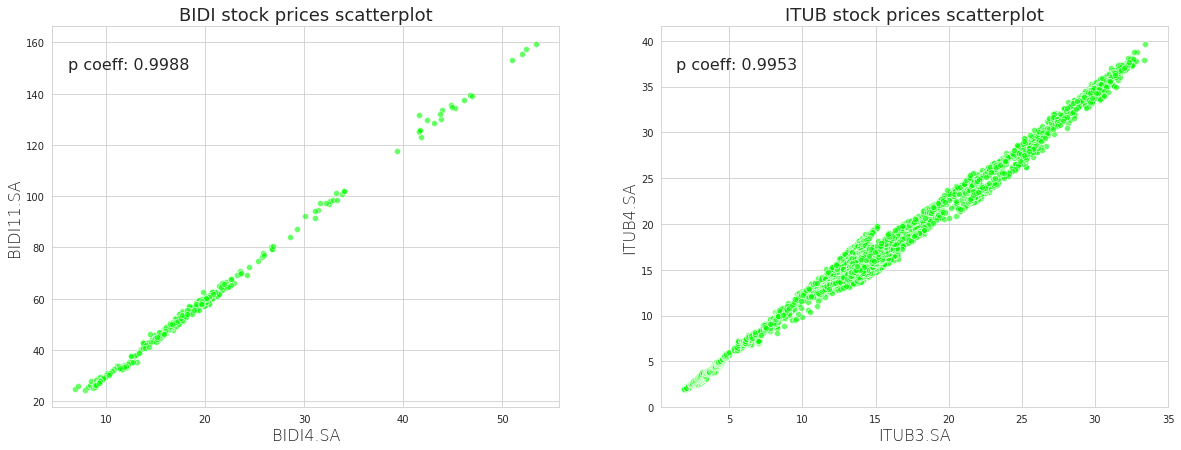

In [3]:
# Plotting the scatterplots for both close prices of both companies

fig = plt.figure(figsize=(20,7)) # figure
sns.set_style("whitegrid")

for ax, df in enumerate(df_list, 1):

    axe = plt.subplot(1,2,ax)
    sns.scatterplot(df.iloc[:,0], df.iloc[:,1], alpha=0.6, color='lime')

    axe.text(0.15,0.9,'p coeff: {:.4f}'.format(corr_list[ax-1]),horizontalalignment='center',
         verticalalignment='center', transform=axe.transAxes, fontsize=16)
    
    title = df.columns[0].replace('.SA','')[0:4] # getting company code

    plt.title('{} stock prices scatterplot'.format(title), fontsize=18)
    plt.xlabel('{}'.format(df.columns[0]), fontsize=16, fontweight=10)
    plt.ylabel('{}'.format(df.columns[1]), fontsize=16, fontweight=10)

plt.show()

We've also got stocks that have strong correlations and are not necessarily from the same company. We'll now analyze the behavior of some stocks that are highly correlated with the Ibovespa index (index for the general B3 stocks).

In [4]:
# Obtaining, close prices df and respective correlations with Ibovespa index

#dfs:
df_list = [cpfe_df, mglu_df, wege_df, romi_df] = closePrices(['CPFE3.SA','^BVSP']), closePrices(['MGLU3.SA','^BVSP']), closePrices(['WEGE3.SA','^BVSP']), closePrices(['ROMI3.SA','^BVSP'])

#correlations:
corr_list = [cpfe_corr, mglu_corr, wege_corr, romi_corr] = cpfe_df.corr().iloc[0,1], mglu_df.corr().iloc[0,1], wege_df.corr().iloc[0,1], romi_df.corr().iloc[0,1]

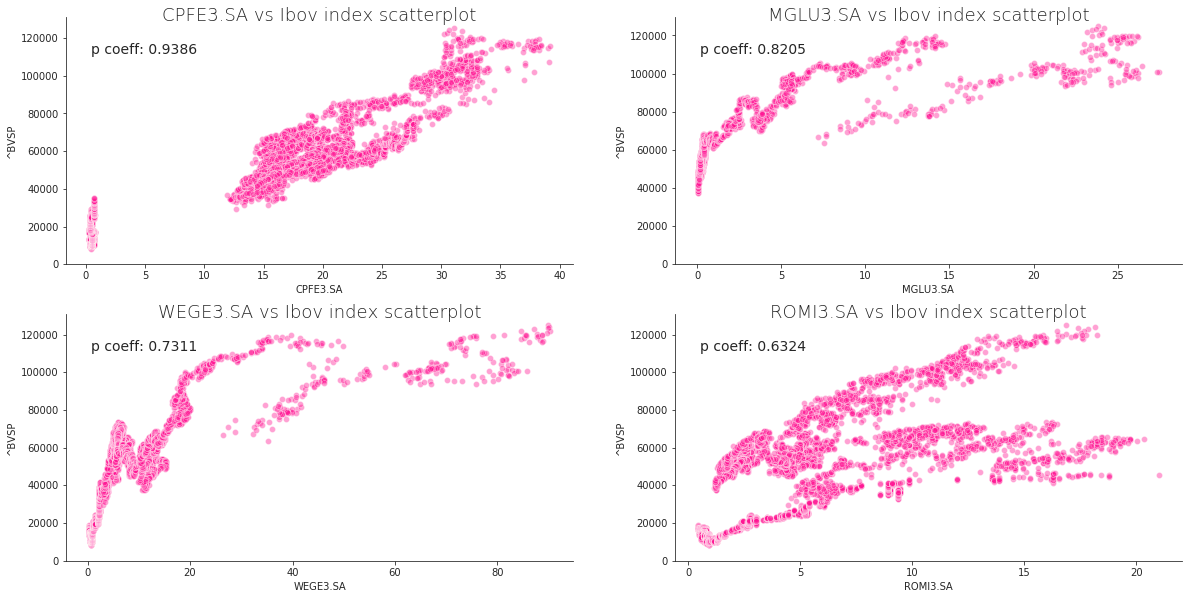

In [5]:
# We're going to make 4 plots, in decending order of correlation:

fig = plt.figure(figsize=(20,10))# figure
sns.set_style("ticks")


#iterating in df_list

for ax, df in enumerate(df_list,1):

    axe = plt.subplot(2,2,ax) # making a 2x2 grid
    sns.scatterplot(df.iloc[:,0],df.iloc[:,1], alpha=0.4, color='deeppink')
    
    axe.text(0.05,0.85,'p coeff: {:.4f}'.format(corr_list[ax-1]), 
             transform=axe.transAxes, fontsize=14)
    
    plt.yticks(np.linspace(0,120000, 7)) # making the ticks equal for all subplots
    plt.title('{} vs Ibov index scatterplot'.format(df.columns[0]), 
              fontsize=18, position=(0.5,0.96), fontweight=1)


sns.despine()    
plt.show()

The plots above are in deceding order of correlation (see "p coeff" legend on each plot). We can see that, in general, the lower the correlation gets, the more scattered the plot will be in all possible directions.

### 2. Negative "strong" correlations

Now, let's do the same thing for stocks that are strongly and negatively correlated with the Ibovespa index. For more strong correlations, we can see a very subtle "fit" for a line with negative slope.

In [6]:
# as above, we need first to gather the data with our closePrices function

df_list = [plpl_df, rnew_df, boas_df] = closePrices(['PLPL3.SA','^BVSP']), closePrices(['RNEW11.SA','^BVSP']), closePrices(['BOAS3.SA','^BVSP'])

# and then register the correlations on a list

corr_list = [plpl_corr, rnew_corr, boas_corr] = plpl_df.corr().iloc[0,1], rnew_df.corr().iloc[0,1], boas_df.corr().iloc[0,1]

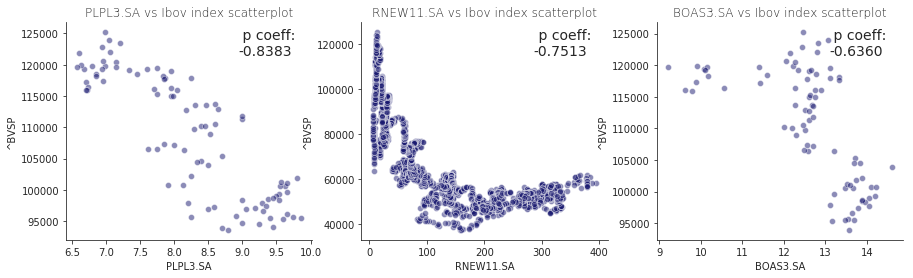

In [12]:
# Ploting results in the same way as we did for positive correlations

fig = plt.figure(figsize=(15,4))

#iterating in df_list

for ax, df in enumerate(df_list,1):

    axe = plt.subplot(1,3,ax) # making a 2x2 grid
    sns.scatterplot(df.iloc[:,0],df.iloc[:,1], alpha=.5, color='midnightblue')
    
    axe.text(0.70,0.85,' p coeff: \n{:.4f}'.format(corr_list[ax-1]), 
             transform=axe.transAxes, fontsize=14)
    
    plt.title('{} vs Ibov index scatterplot'.format(df.columns[0]), 
              fontsize=12,fontweight=1)


sns.despine()    
plt.show()

OBS: Note that some stocks are older than others! We can see that by the range in y values and the amount of points (days) on plot.

## Weak correlation

Lastly, we're going to check some weak correlations between stocks. We'll see that those plots will be usually very scattered.

In [13]:
# gathering data

df_list = [biomCmig, vvarAzul] = closePrices(['BIOM3.SA','CMIG3.SA']), closePrices(['VVAR3.SA','AZUL4.SA'])

# Pearson correlation coefficients:

corr_list = [biomCmig_corr, vvarAzul_corr] = biomCmig.corr().iloc[0,1], vvarAzul.corr().iloc[0,1]

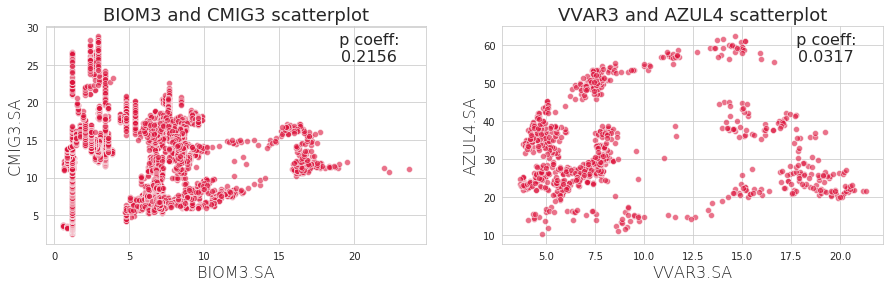

In [14]:
# in this final plot, we're going to see a case of weak correlation between stocks

fig = plt.figure(figsize=(15,4))

sns.set_style('whitegrid')

for ax, df in enumerate(df_list, 1):
    
    axe = plt.subplot(1,2,ax)
    sns.scatterplot(df.iloc[:,0], df.iloc[:,1], alpha=0.6, color='crimson')

    axe.text(0.85,0.9,' p coeff: \n{:.4f}'.format(corr_list[ax-1]),horizontalalignment='center',
         verticalalignment='center', transform=axe.transAxes, fontsize=16)
    
    tickers = [df.columns[0].replace('.SA',''),
               df.columns[1].replace('.SA','')] # obtaining different tickers on a list

    plt.title('{} and {} scatterplot'.format(tickers[0],tickers[1]), fontsize=18)
    plt.xlabel('{}'.format(df.columns[0]), fontsize=16, fontweight=10)
    plt.ylabel('{}'.format(df.columns[1]), fontsize=16, fontweight=10)

plt.show()
    

An interesting thing to note is that within the pairs of stocks, we don't have any stock of the same industrial sector. For example, CMIG3 is a stock from Cemig, an energy company, while BIOM3 is a stock from Biomm, a farmaceutic company. This can explain in parts why this correlation is so weak, as these companies act in very different markets.